<a href="https://colab.research.google.com/github/Himanshi143/Machine-Learning-By-Campusx/blob/main/Day-30/Day_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats

In [3]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [8]:
df=pd.read_csv('/content/train.csv',usecols=['Age','Survived','Fare'])

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True  )

In [12]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<ipython-input-16-0b604397b2ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'Age qqplot')

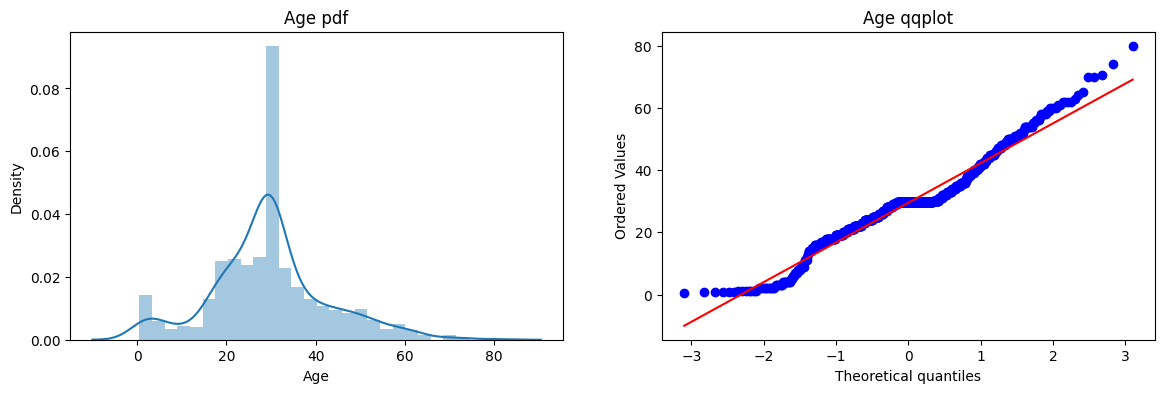

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age pdf")

plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age qqplot")

<ipython-input-17-bdad968303df>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'Age qqplot')

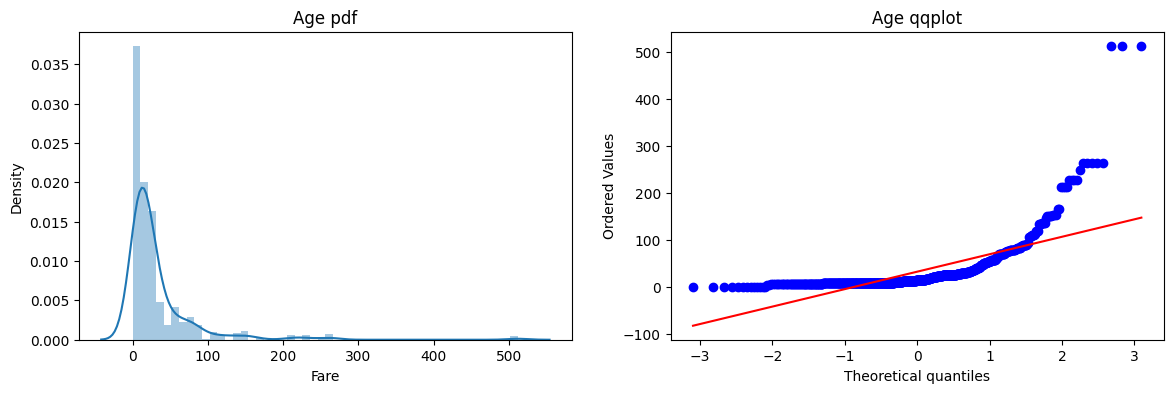

In [17]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title("Age pdf")

plt.subplot(122)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Age qqplot")

In [18]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [19]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred2=clf2.predict(x_test)

print('acc:',accuracy_score(y_test,y_pred))
print('acc1',accuracy_score(y_test,y_pred2))

acc: 0.6480446927374302
acc1 0.6759776536312849


In [20]:
trf=FunctionTransformer(func=np.log1p)

In [21]:
x_train_trans=trf.fit_transform(x_train)
x_test_trans=trf.transform(x_test)

In [22]:
clf.fit(x_train_trans,y_train)
clf2.fit(x_train_trans,y_train)
y_pred=clf.predict(x_test_trans)
y_pred2=clf2.predict(x_test_trans)

print('acc:',accuracy_score(y_test,y_pred))
print('acc1',accuracy_score(y_test,y_pred2))

acc: 0.6815642458100558
acc1 0.664804469273743


In [23]:
x_trans=trf.fit_transform(x)
print('lr: ',np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
print('dt: ',np.mean(cross_val_score(clf2,x_trans,y,scoring='accuracy',cv=10)))

lr:  0.678027465667915
dt:  0.6599875156054932


Text(0.5, 1.0, 'After Age qqplot')

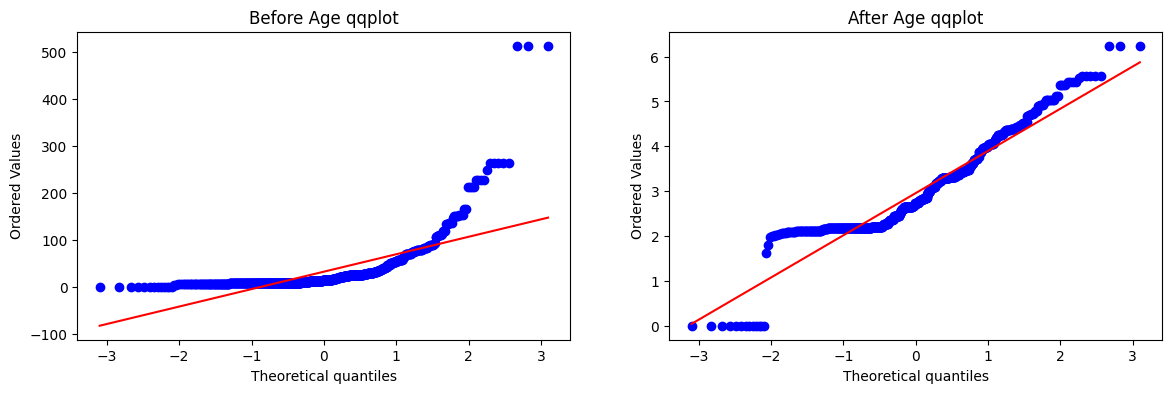

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Fare'],dist="norm",plot=plt)
plt.title("Before Age qqplot")

plt.subplot(122)
stats.probplot(x_train_trans['Fare'],dist="norm",plot=plt)
plt.title("After Age qqplot")

Text(0.5, 1.0, 'Age qqplot')

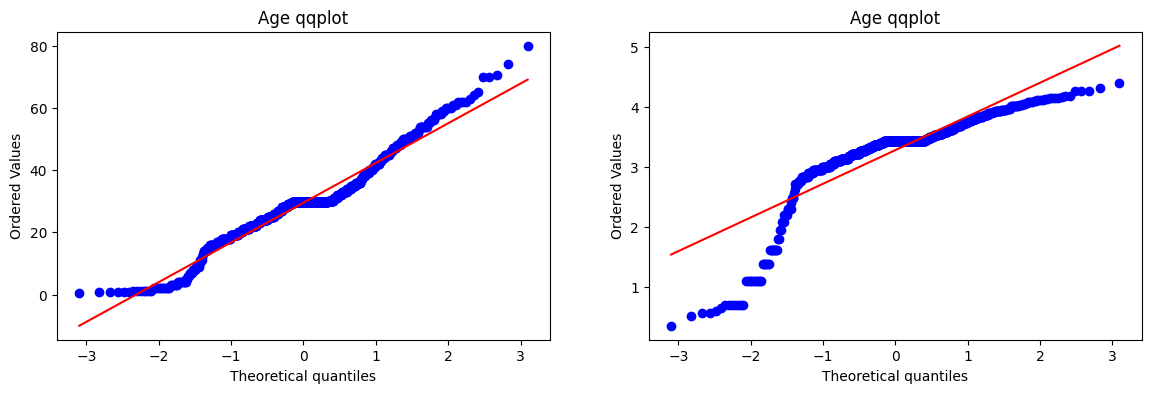

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title("Age qqplot")

plt.subplot(122)
stats.probplot(x_train_trans['Age'],dist="norm",plot=plt)
plt.title("Age qqplot")

In [26]:
trf2=ColumnTransformer([
    ('log',FunctionTransformer(np.log1p),['Fare'])
],remainder='passthrough')
x_train_t=trf2.fit_transform(x_train)
x_test_t=trf2.transform(x_test)

In [27]:
clf.fit(x_train_t,y_train)
clf2.fit(x_train_t,y_train)
y_pred=clf.predict(x_test_t)
y_pred2=clf2.predict(x_test_t)

print('acc:',accuracy_score(y_test,y_pred))
print('acc1',accuracy_score(y_test,y_pred2))

acc: 0.6703910614525139
acc1 0.6703910614525139


In [28]:
x_trans1=trf2.fit_transform(x)
print('lr: ',np.mean(cross_val_score(clf,x_trans1,y,scoring='accuracy',cv=10)))
print('dt: ',np.mean(cross_val_score(clf2,x_trans1,y,scoring='accuracy',cv=10)))

lr:  0.6712609238451936
dt:  0.6543445692883895


Other Transformation

In [31]:
def apply_t(transform):
  x=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf=ColumnTransformer([
      ('log',FunctionTransformer(transform),['Fare'])
  ],remainder='passthrough')

  x_trans=trf.fit_transform(x)
  clf=LogisticRegression()

  print('lr: ',np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))
  plt.subplot(121)
  stats.probplot(x['Fare'],dist="norm",plot=plt)
  plt.title("Before Age qqplot")

  plt.subplot(122)
  stats.probplot(x_trans[:,0],dist="norm",plot=plt)
  plt.title("After Age qqplot")

lr:  0.6589013732833957


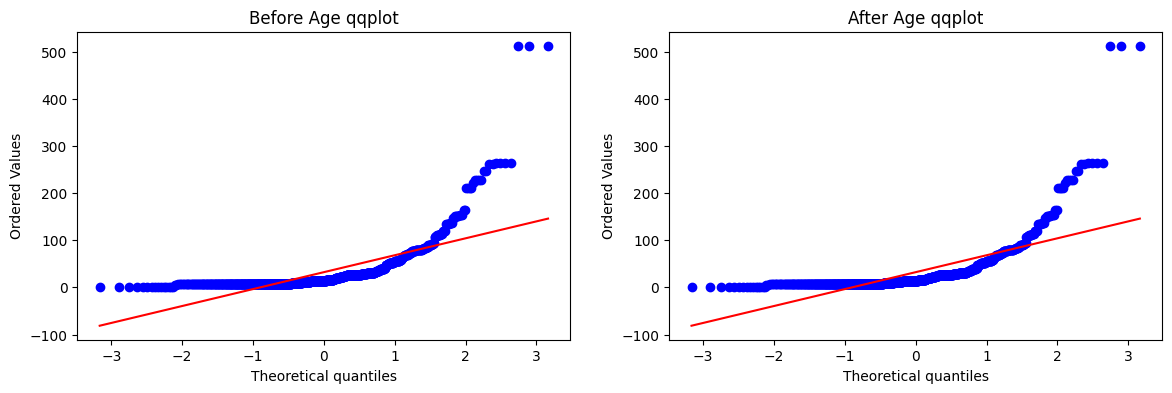

In [32]:
apply_t(lambda x:x)

lr:  0.6611485642946316


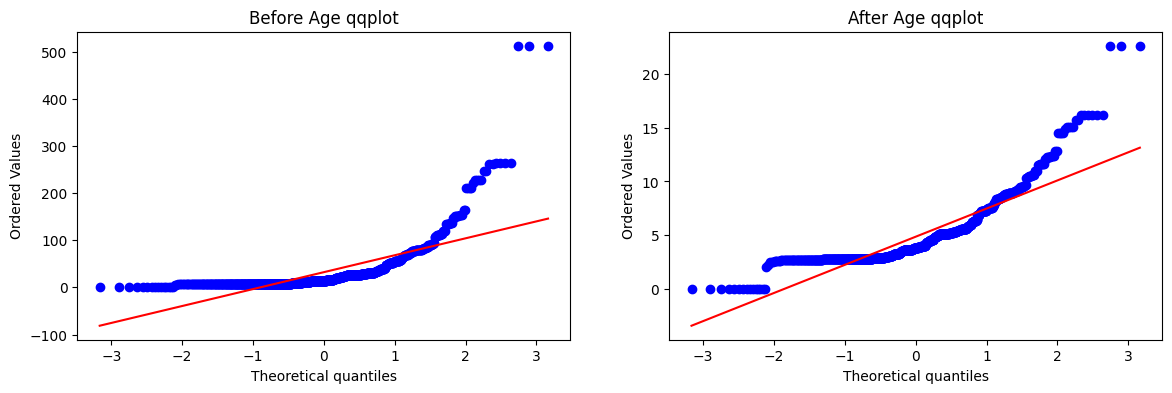

In [34]:
apply_t(lambda x:np.sqrt(x))

lr:  0.61729088639201


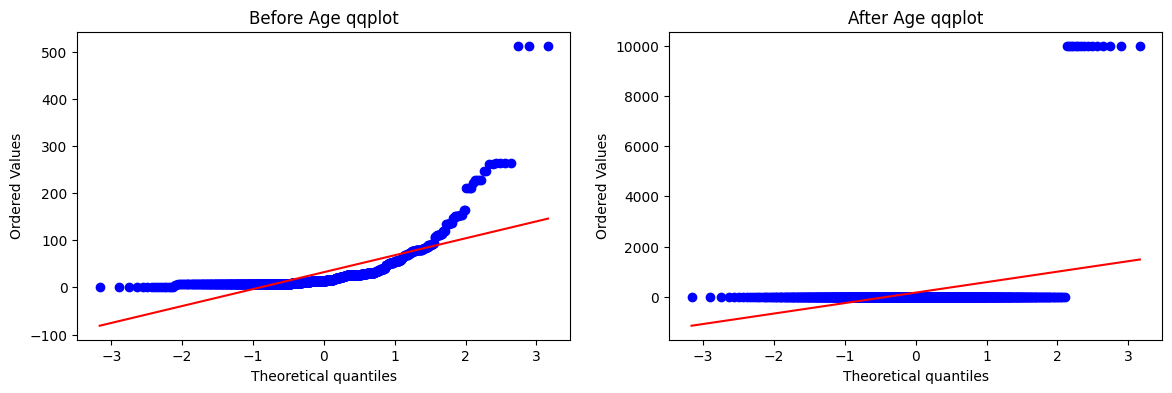

In [35]:
apply_t(lambda x:1/(x+0.0001))